reference colab : https://colab.research.google.com/github/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb#scrollTo=R6qaGho0TV4S

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import tarfile
import urllib.request

In [5]:
def load_housing_data():
    dataset_path = Path("datasets/housing.tgz")
    if not dataset_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, dataset_path)
        with tarfile.open(dataset_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return (pd.read_csv(Path("datasets/housing/housing.csv")))

housing = load_housing_data()

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# What are the values in ocean proximity

housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

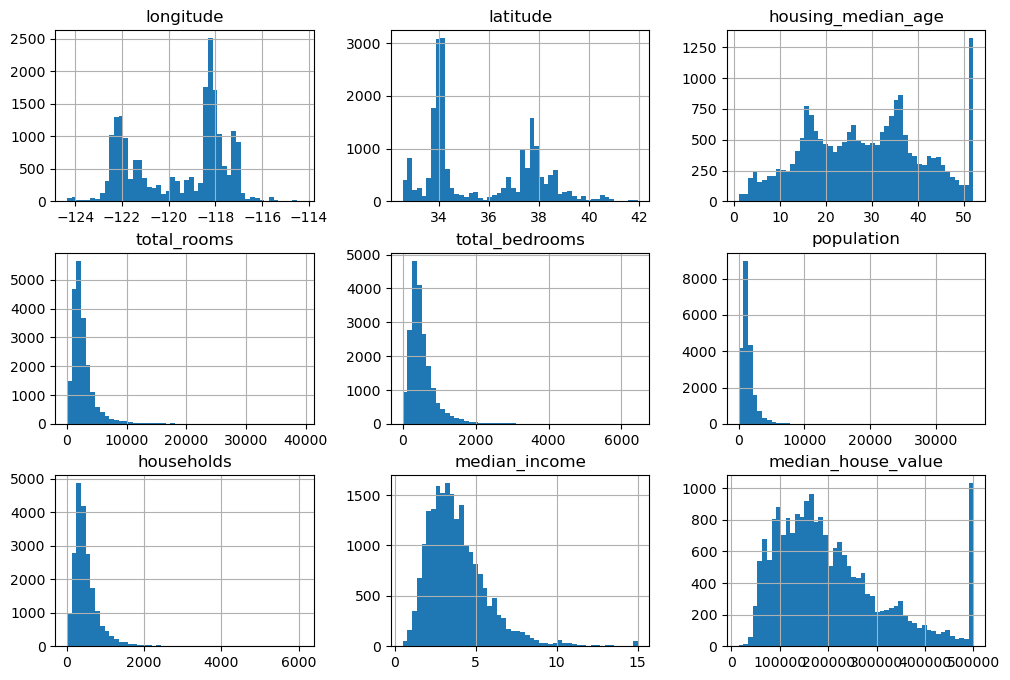

In [10]:
housing.hist(bins=50, figsize=(12,8))

## Create a Test Set

Text(0, 0.5, 'Number of districts')

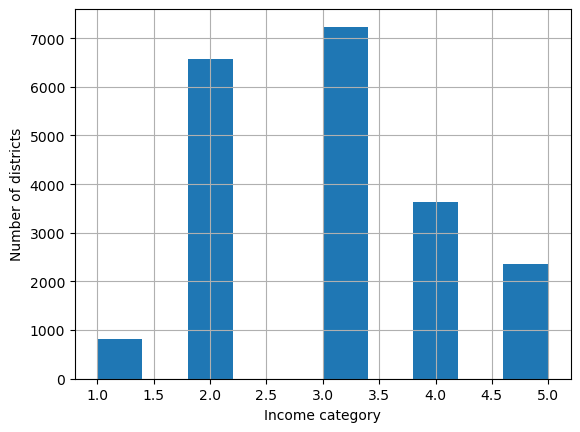

In [11]:
# Create a new category to have the median income more distributed. In the graph we see that most of it is clustered arount 1 and 6, so the prediction might be biased.
# We create a new category which will have a label from 1 to 5, depending on the median income. Then we'll use this variable to generate a stratified split.

housing["income_cat"] = pd.cut(housing["median_income"], [0., 1.5, 3., 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()
plt.xlabel("Income category")
plt.ylabel("Number of districts")

In [12]:
from sklearn.model_selection import train_test_split

# División en train y test con stratify para la variable income_cat, porque en el enunciado nos han dicho que es muy importante y para que no esté biased.
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [13]:
# Borramos la variable "income_cat" porque ya la hemos utilizado para hacer el split y no la vamos a volver a utilizar.

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Explore and Visualize the Data

In [14]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

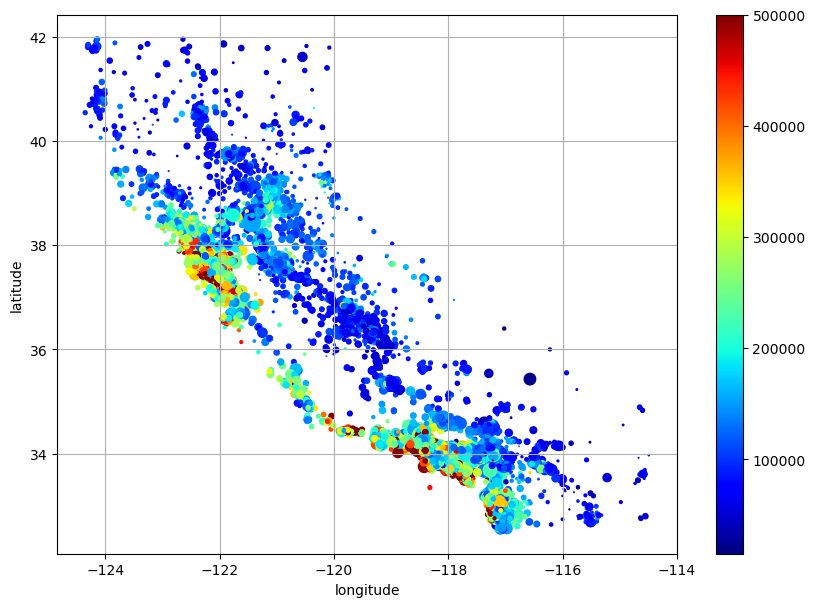

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude",
             grid=True, s=housing["population"] / 100,
             c=housing["median_house_value"], cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

### Looking for correlations

In [16]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"]

longitude            -0.050859
latitude             -0.139584
housing_median_age    0.102175
total_rooms           0.137455
total_bedrooms        0.054635
population           -0.020153
households            0.071426
median_income         0.688380
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [17]:
# Create new atributes with the ones that we have looking for improved correlations

In [18]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]


In [19]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

## Preparing data for ML algorithms

In [20]:
# Dividir entre X e y

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Clean the data

In [21]:
# Para eleliminar los valores nulos, hay 3 formas, eliminar la columna, las filas o reemplazarlo con la mediana/otro valor.
# En este caso vamos a utilizar el de sustituir por la mediana utilizando la clase SimpleImputer.
# La ventaja de utilizar esta clase con respecto a sustituirlos utilizando pandas es que la clase guarda estos valores y se puden luego proporcionar a ejemplos del conjunto de validacion/testeo

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

X = imputer.transform(housing_num)

# Lo convertimos a DataFrama, ya que los transformadores de scikit-learn suelen devolver arrays de Numpy
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

### Handling Text and Categorical Data

In [22]:
housing_cat = housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
...,...
14207,<1H OCEAN
13105,INLAND
19301,NEAR OCEAN
19121,<1H OCEAN


In [23]:
# One Hot Encoding

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False) # Sparse para que devuelva un array de numpy y no una matriz de scipy
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

# Es posible que tenga que convertir este output en un Dataframe de Pandas con sus nombres de columnas para luego acoplarlo.

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

### Feature scaling and Transformation

In [24]:
# 2 main ways, min-max-scaling (normalization) and standardization
from sklearn.preprocessing import StandardScaler

### Custom Transformers

<Axes: ylabel='Frequency'>

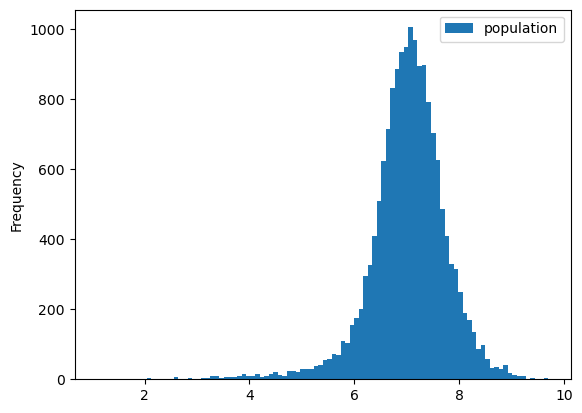

In [25]:
# Creating a custom transformer for log_transform for heavy tailed distributions.

from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])
log_pop.plot(kind="hist", bins=100)

In [26]:
# Custom class transformer. A class is needed for transformers that need to fit on data.
# Note: there is a validation package to do tests and make it safer.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_
        

In [27]:
# Tambien la clase de cluster similarity para utilizarla luego

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel


class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

### Transformation Pipelines

In [28]:
from sklearn.pipeline import Pipeline

# Create a pipeline for numerical data

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

# Other way to create it without "names" is using make_pipeline

from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

# Using the pipeline

housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

# To recover a dataframe we can use the get_feature_names_out() method


array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [29]:
# We have handled categorical and numerical data separately. We can create a pipeline to handle both

from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

# Create a pipeline for categorical data

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])


In [30]:
# There is a way to make the pipeline select the columns depending on their type so we don't have to name the columns manually

from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

# Now we can apply this pipeline to the housing data

housing_prepared = preprocessing.fit_transform(housing)

# Convert it again to DataFrame

housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index)
housing_prepared_fr.head(2)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0


In [31]:
# Creacion de un pipeline que hace: 1. Reemplazar valores nulos, 2. One-Hot-Encoding para las variables categoricas, 3. Creacion de las nuevas variables ratio
# 4. Reemplazar latitude y longitude por proximidad de cluster, 5. Aplicar logaritmos a distribuciones con largas colas, 6. Escalar los atributos numericos

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [32]:
# Ejecutar el pipeline en los datos

housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

## Select and Train a Model

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)
housing_predictions = lin_reg.predict(housing)
print(housing_predictions[:5].round(2))
print(housing_labels.iloc[:5].round(2))

[242761.81 375862.79 127480.98  99355.3  324610.74]
13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64


In [34]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
lin_rmse

68647.9568670666

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
tree_rmse

# Clear Overfitting, by performing cross validation, we see after that performance is poor.

0.0

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

forest_rmses = -cross_val_score(forest_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

pd.Series(forest_rmses).describe()

count       10.000000
mean     47002.931706
std       1048.451340
min      45667.064036
25%      46494.358345
50%      47093.173938
75%      47274.873814
max      49354.705514
dtype: float64

## Fine-Tune the Model

In [37]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
])

param_grid = [
    {"preprocessing__geo__n_clusters" : [5, 8, 10],
     "random_forest__max_features" : [4, 6, 8]},
    {"preprocessing__geo__n_clusters" : [10, 15],
     "random_forest__max_features" : [6, 8, 10]},
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002875EC78A60>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [39]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [41]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,7.258619,0.037155,0.129529,0.002579,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-43535.728124,-43753.147171,-44568.889283,-43952.588193,444.738152,1
13,9.253011,0.016136,0.117225,0.003594,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-44084.115907,-44204.924326,-44862.665796,-44383.902009,342.110841,2
14,11.282004,0.088248,0.120964,0.001544,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-44367.841163,-44496.254950,-45199.975902,-44688.024005,365.780976,3
7,7.257842,0.042909,0.122600,0.007732,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44250.873441,-44628.321123,-45857.123289,-44912.105951,685.764787,4
9,7.265646,0.025064,0.126528,0.003495,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44250.873441,-44628.321123,-45857.123289,-44912.105951,685.764787,4


### Randomized Search

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    "preprocessing__geo__n_clusters" : randint(low=3, high=50),
    "random_forest__max_features" : randint(low=2, high=20),
}

rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3, scoring="neg_root_mean_squared_error", random_state=42)
rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028768A4BA30>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028768A68220>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [45]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.07, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.01, 0.02,
       0.04, 0.01, 0.  , 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ,
       0.01, 0.  , 0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.03, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.02, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [47]:
sorted(zip(feature_importances,
          final_model["preprocessing"].get_feature_names_out()), reverse=True)

[(0.19234364612672789, 'log__median_income'),
 (0.07643709476448396, 'cat__ocean_proximity_INLAND'),
 (0.0650352691209638, 'bedrooms__ratio'),
 (0.05549970022834359, 'rooms_per_house__ratio'),
 (0.048138515308740734, 'people_per_house__ratio'),
 (0.035961262692298664, 'geo__Cluster 3 similarity'),
 (0.02532481116417277, 'geo__Cluster 22 similarity'),
 (0.022135725960477252, 'geo__Cluster 6 similarity'),
 (0.022122145871171783, 'geo__Cluster 17 similarity'),
 (0.018070857482773945, 'geo__Cluster 2 similarity'),
 (0.01766604492008499, 'geo__Cluster 32 similarity'),
 (0.016852220238732653, 'geo__Cluster 18 similarity'),
 (0.014891074224474443, 'geo__Cluster 7 similarity'),
 (0.014477873989140293, 'geo__Cluster 43 similarity'),
 (0.014398636979858279, 'geo__Cluster 21 similarity'),
 (0.01364974641398396, 'geo__Cluster 40 similarity'),
 (0.013638021303871461, 'geo__Cluster 38 similarity'),
 (0.013331070971939203, 'geo__Cluster 41 similarity'),
 (0.013206364581236148, 'geo__Cluster 34 simila

## Evaluating on the Test Set

In [48]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

41385.520595938855


In [50]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([39234.70930266, 43429.9460733 ])

## Launch, Monitor, and Mantain Your System

In [ ]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")